In [1]:
import numpy as np
from sys import path

path.append('/home/sasamb4ikk/sber/AmericanOptionsPricingApproaches/src')
from samplers import WienerRainbowPutOptionSampler, GeometricBrownianMotionPutSampler
from american_monte_carlo import PricerAmericanMonteCarlo
from basis_functions import PolynomialTransformer
import matplotlib.pyplot as plt
from BinomialTree import price_gbm_put


In [2]:
%load_ext autoreload
%autoreload 2

# Rainbow Wiener 2-dimensional

In [11]:
sampler = WienerRainbowPutOptionSampler(
    cnt_trajectories = 1_000_000,
    cnt_times = 3,
    t = 1,
    time_grid = None,
    seed = 345,
    sigmas = [1., 1.],
    strike = 0.
)

sampler.sample()

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

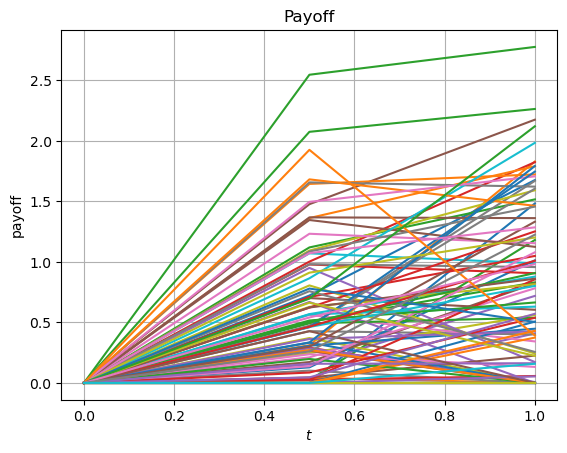

In [11]:
sampler.plot(100)

In [12]:
in_the_money_indices = np.where(sampler.payoff[:, 1] > 1e-9)[0]
len(in_the_money_indices)

749942

In [13]:
features = sampler.markov_state[in_the_money_indices, 1]
transformed = PolynomialTransformer(5).fit_transform(features)
transformed.shape

(749942, 21)

In [14]:
regularization = np.eye(transformed.shape[1], dtype=float) * 0.
inv = np.linalg.pinv((transformed.T @ transformed + regularization), rcond=1e-4)
weights = inv @ transformed.T @ sampler.payoff[in_the_money_indices, 2]
continuation_value = transformed @ weights

In [15]:
indicator = (continuation_value < sampler.payoff[in_the_money_indices, 1])
indicator.sum()

1109

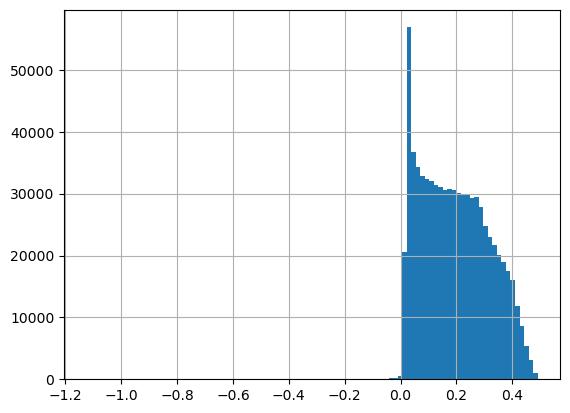

In [16]:
plt.hist(continuation_value - sampler.payoff[in_the_money_indices, 1], bins=100);
plt.grid()

In [2]:
amc = PricerAmericanMonteCarlo(
    sampler=WienerRainbowPutOptionSampler(
        cnt_trajectories=1_000_000,
        cnt_times=30,
        t=1,
        time_grid = None,
        seed = 345,
        sigmas = [1., 1.],
        strike=0.
    ),
    regularization_alpha=1e-4
)

 97%|#########6| 28/29 [00:06<00:00,  4.11it/s]

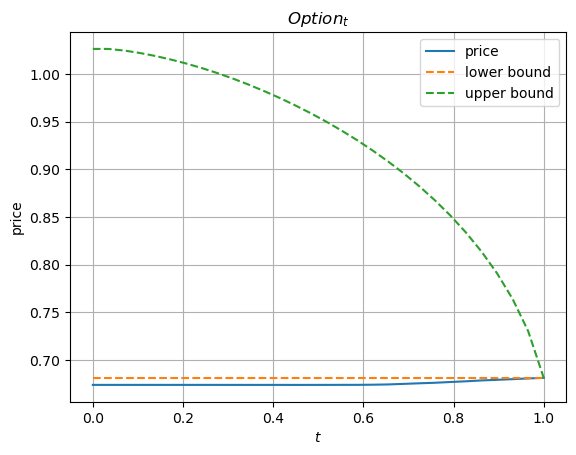

/home/sasamb4ikk/sber/AmericanOptionsPricingApproaches/src/abstracts.py:45: UserWarning: We cannot plot >=2d processes
  warnings.warn("We cannot plot >=2d processes")


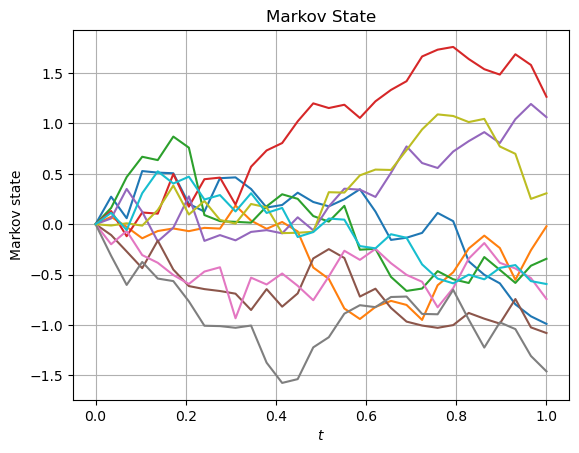

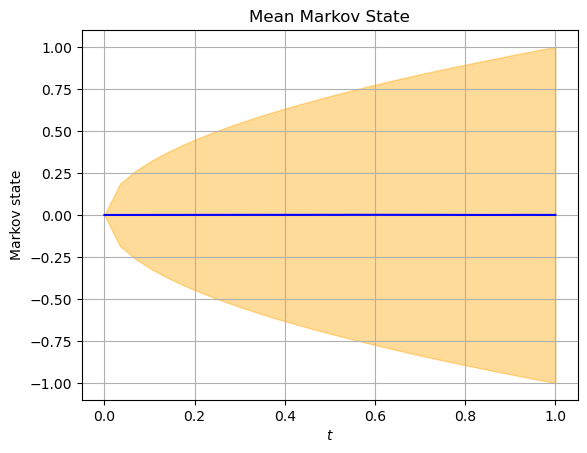

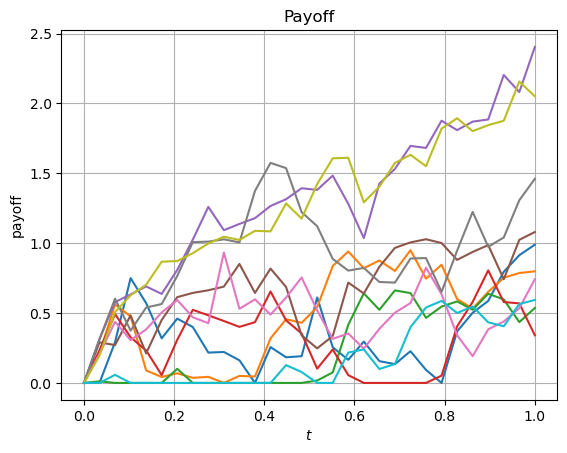

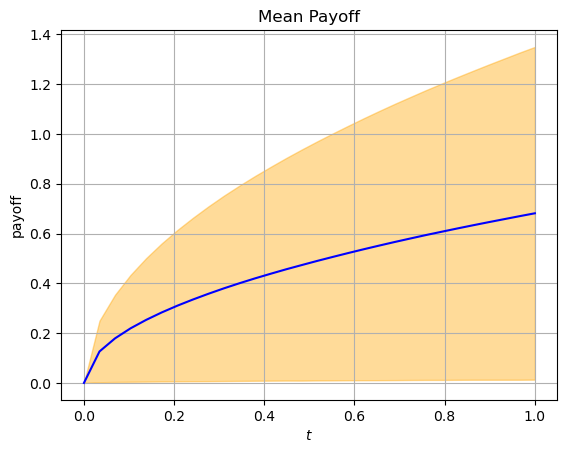

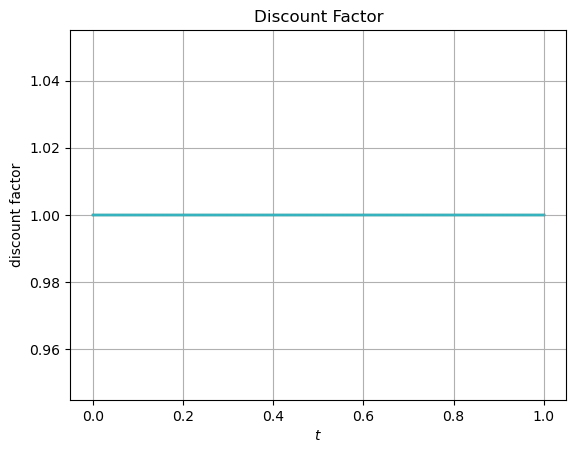

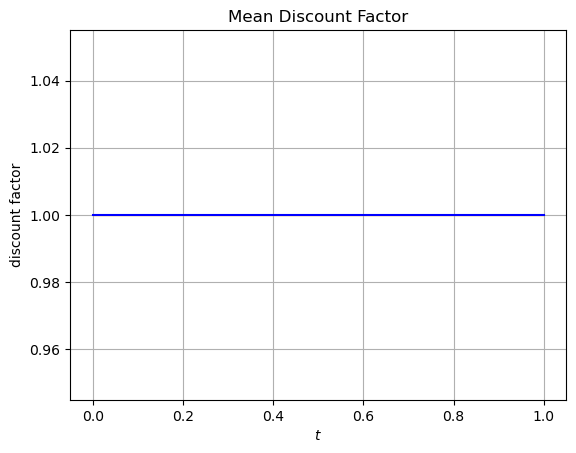

[0.6741143927731958,
 0.6741143927731958,
 0.6741143927731958,
 0.6741143927731958,
 0.6741138582795285,
 0.6741138582795285,
 0.6741143113220678,
 0.6741147118654072,
 0.6741104084735745,
 0.6740969691797464,
 0.6740962580472359,
 0.674094771095048,
 0.6741046354697267,
 0.6740780485891651,
 0.6740973199588929,
 0.6741111911564683,
 0.6741416439659262,
 0.6741595190634225,
 0.67430056589986,
 0.6745924880964904,
 0.6751732089717778,
 0.6757867642493822,
 0.6763409888945761,
 0.6771360536607336,
 0.6778778623360022,
 0.6787638667735337,
 0.679427867149068,
 0.6801216461653855,
 0.680863272278665,
 0.6814759882666009]

In [3]:
amc.price(
    test=False,
    quiet=False
)

 55%|#####5    | 16/29 [00:00<00:00, 158.21it/s]

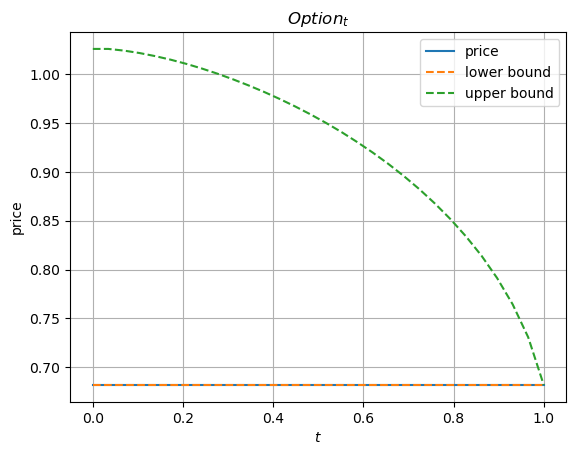

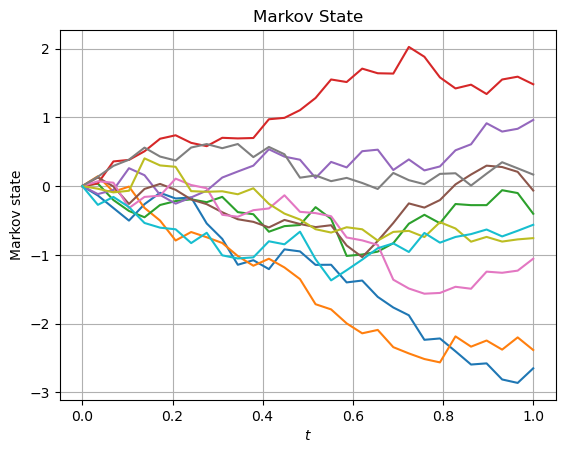

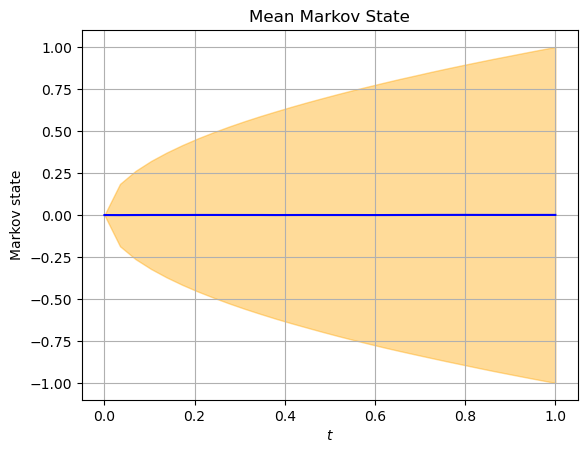

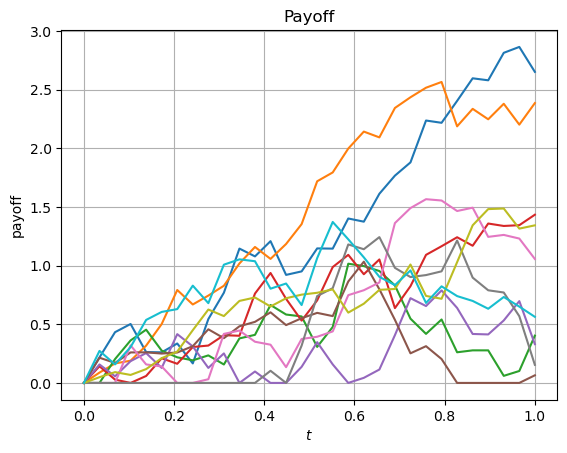

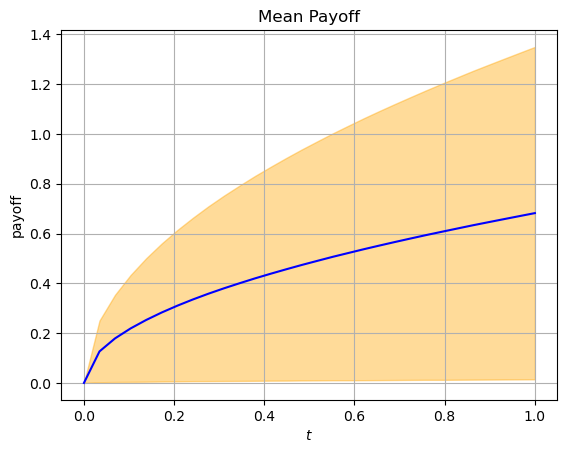

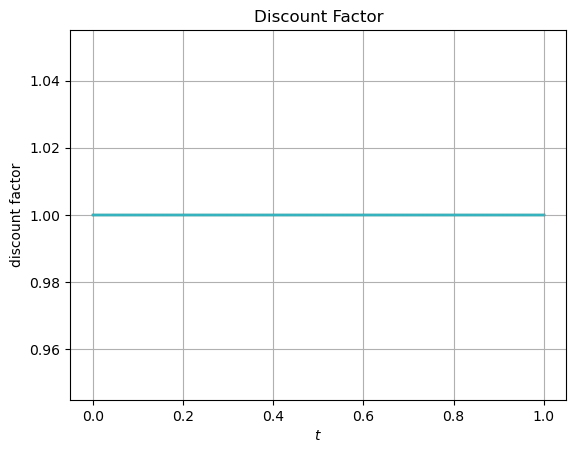

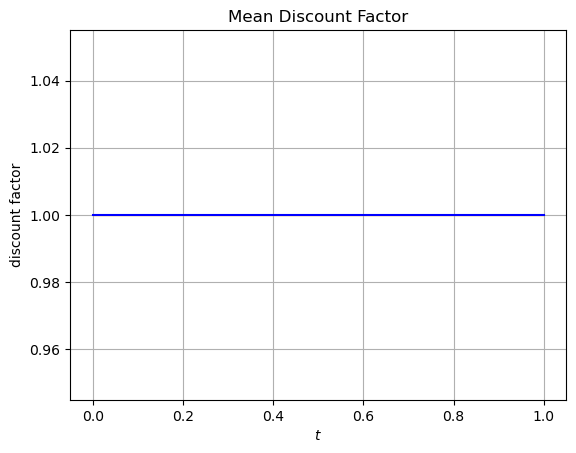

[0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767]

In [5]:
amc.price(
    test=True,
    quiet=False
)

# GBM put

In [4]:
option_params = {
    "asset0": 100.,
    "sigma": 0.1,
    "mu": 0.05,
    "strike": 100.,
    "t": 1
}

## Tree

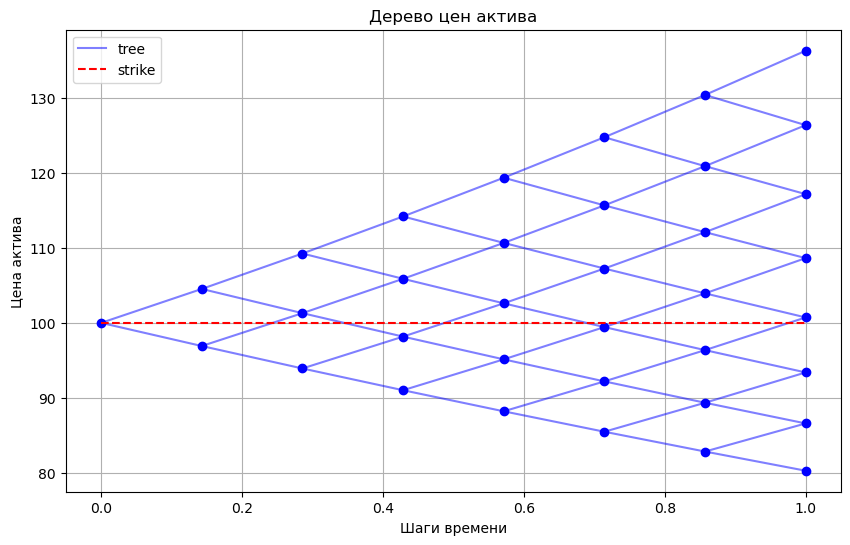

[ 0.          0.          0.          0.          3.63445507 10.65048394
 17.15570097]
[ 0.          0.          0.          1.80428547  7.80335872 14.5158647 ]
[ 0.          0.          0.89571779  4.86550977 11.79190997]
[0.         0.4446693  2.86010241 8.98115633]
[0.22075121 1.64061975 6.08083794]
[0.92405824 3.83324054]
[2.36171308]


In [8]:
cashflows, price_history = price_gbm_put(
    **option_params,
    cnt_times=8
)

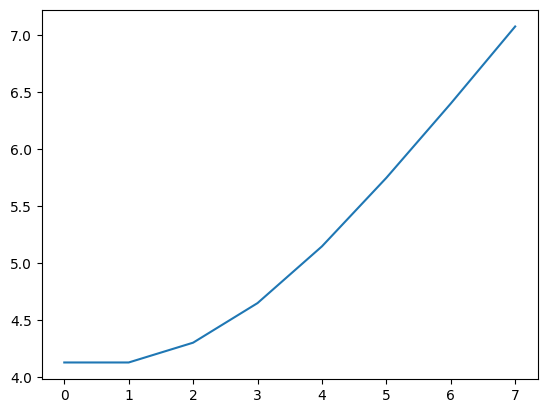

In [27]:
plt.plot(price_history)

## AMC

In [6]:
amc = PricerAmericanMonteCarlo(
    sampler = GeometricBrownianMotionPutSampler(
        cnt_trajectories = 1_000_000,
        cnt_times = 30,
        seed = 345,
        **option_params
    ),
    regularization_alpha = 1e-2
)

 90%|########9 | 26/29 [00:01<00:00, 26.67it/s]

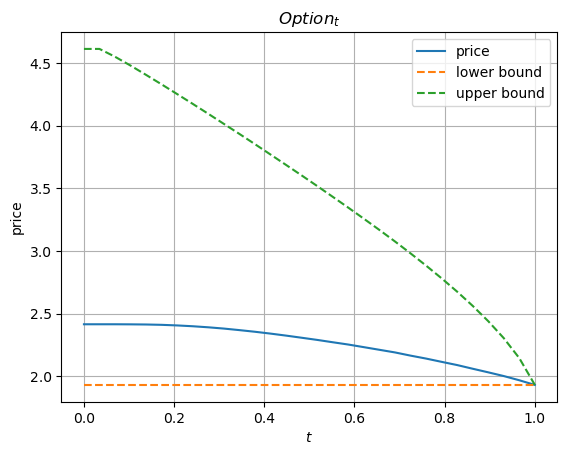

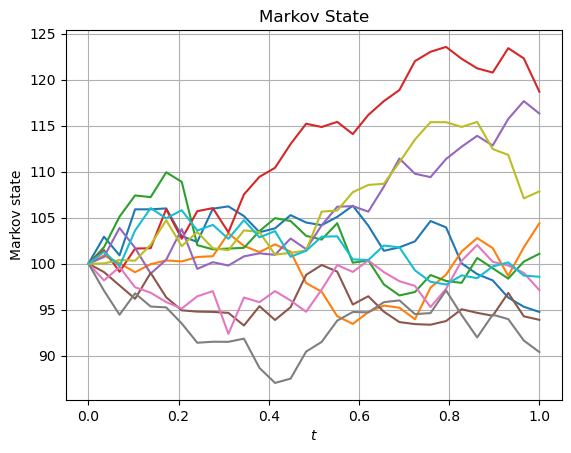

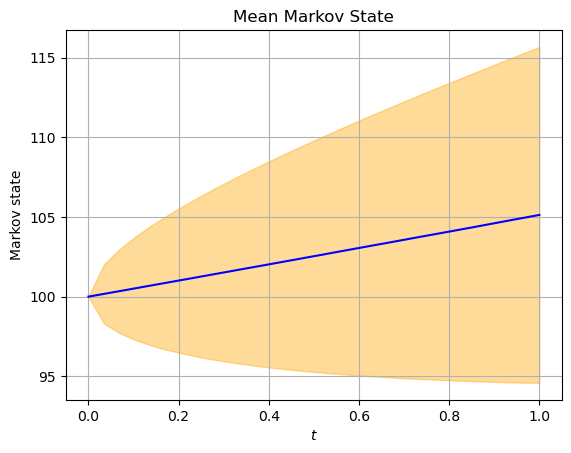

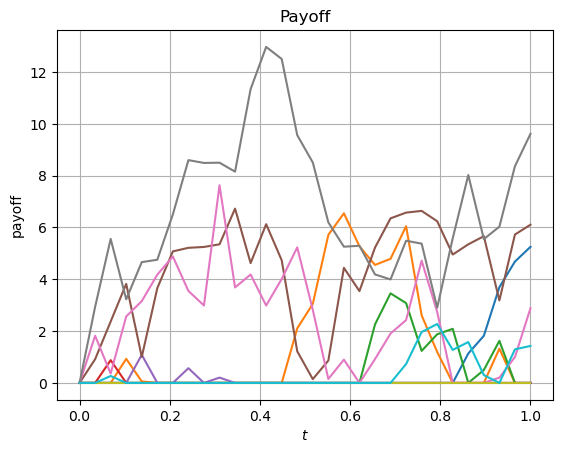

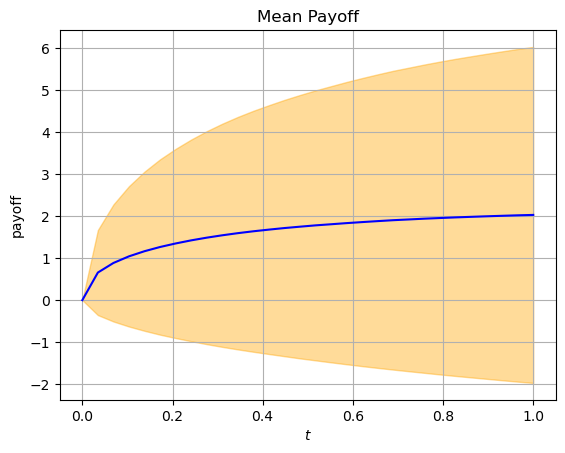

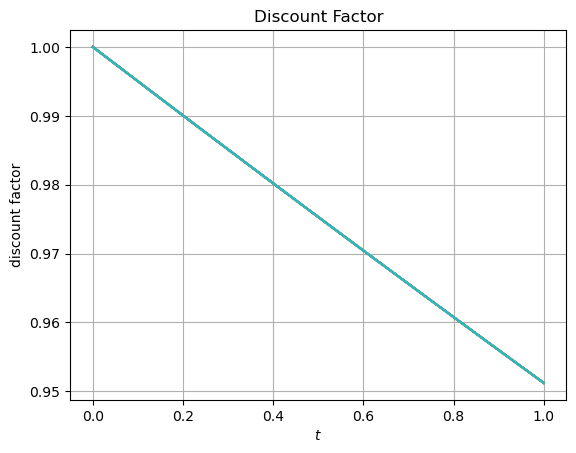

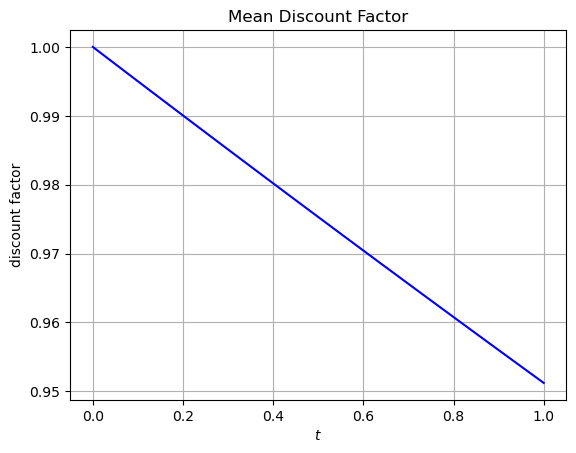

[2.415208666825585,
 2.415208666825585,
 2.4152147595885385,
 2.414588979337598,
 2.4133756497290038,
 2.410705361203462,
 2.40590429372249,
 2.3993725009271585,
 2.390996553353295,
 2.38086347800196,
 2.368501744331418,
 2.3553808131080927,
 2.340706277731799,
 2.324733029353189,
 2.3076988203414173,
 2.290442840216853,
 2.271747027834046,
 2.253470788659649,
 2.2326109316451186,
 2.2115578584118047,
 2.190579239808138,
 2.165101093609524,
 2.141560876358065,
 2.1154222223414787,
 2.0897601635865293,
 2.0603913030977936,
 2.03170296292688,
 2.001996486213115,
 1.9683228452561348,
 1.9312121155204915]

In [7]:
amc.price(
    test=False,
    quiet=False
)

 55%|#####5    | 16/29 [00:00<00:00, 153.54it/s]

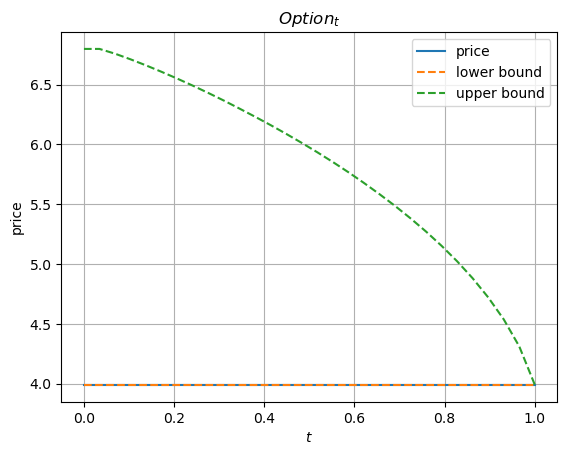

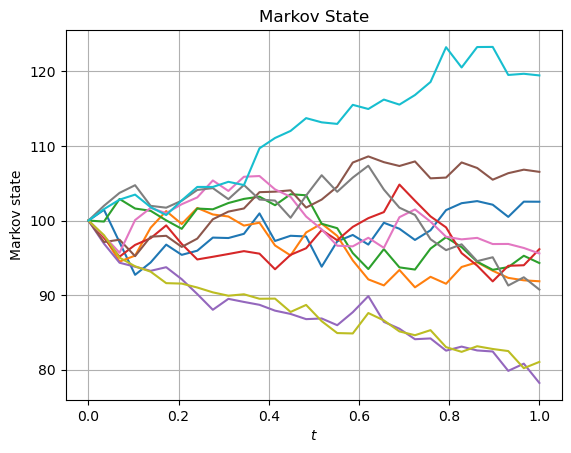

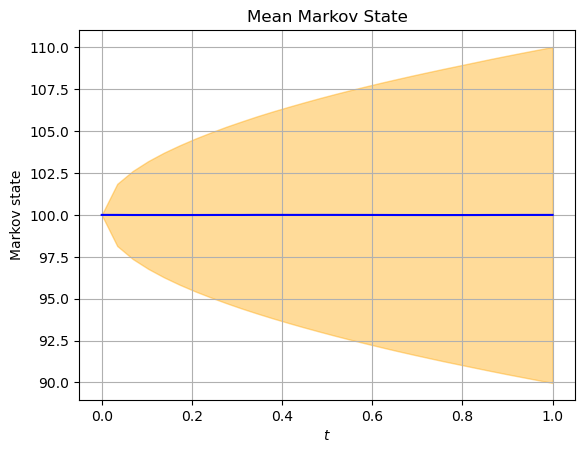

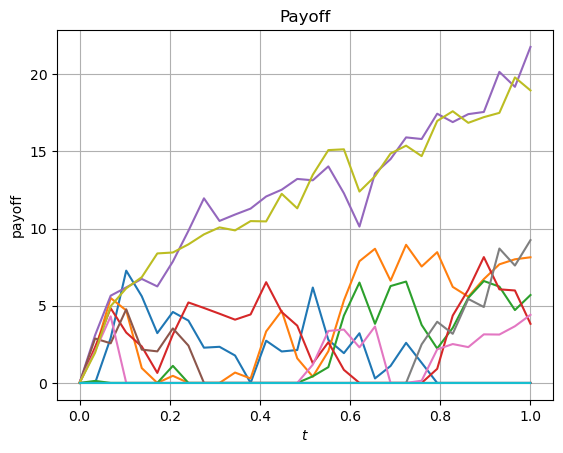

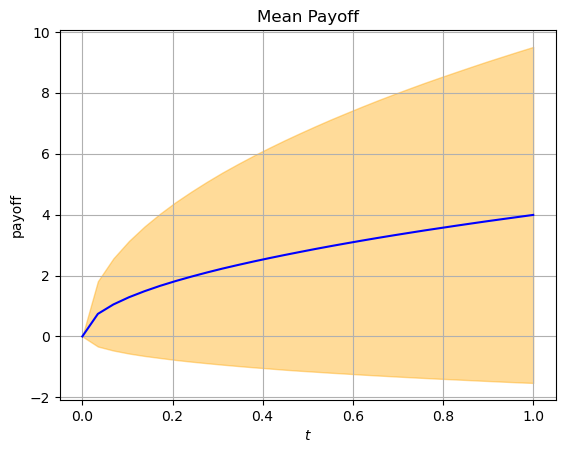

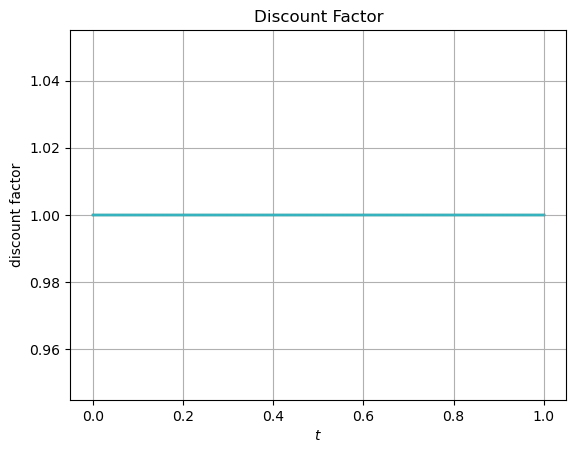

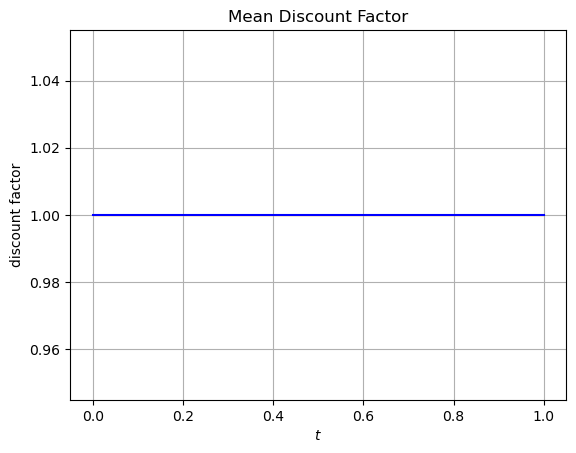

[3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493]

In [9]:
amc.price(
    test=True,
    quiet=False
)